In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from scipy.stats import linregress


<font size="6">**I'VE BEEN WAITING ALL DAY TO SEE THESE CHARTS**</font>

In [2]:
#offense, defense, and special teams groups
offense_pos = ["QB", "RB", "FB", "WR", "TE", "OT", "OG", "C", "OL"]
defense_pos = ["DE", "DT", "DE/DT", "LB", "CB", "S", "DB"]
sp_teams_pos = ["K", "P"]

arrest_data = pd.read_csv('Resources/ArrestIncidents.csv')
arrest_data["YEAR"] = arrest_data["DATE"].str[-4:]

arrest_data.head()

,DATE,TEAM,NAME,POSITION,CASE,CATEGORY,DESCRIPTION,OUTCOME,YEAR
0,3/27/2017,SEA,Trevone Boykin,QB,Arrested,Drugs,"Accused of marijuana possession, public intoxi...",Resolution undetermined.,2017
1,3/26/2017,CHI,Deiondre Hall,CB,Arrested,Disorderly conduct,"Accused of disorderly conduct, public intoxica...",Resolution undetermined.,2017
2,3/26/2017,GB,Makinton Dorleant,CB,Arrested,Police interference,Accused of interfence after scuffle outside of...,Resolution undetermined.,2017
3,3/7/2017,KC,Demetrius Harris,TE,Arrested,Drugs,Suspected of felony marijuana possession as pa...,Resolution undetermined.,2017
4,3/5/2017,LAR,Ethan Westbrooks,DT,Arrested,Domestic violence,Suspected of domestic violence in Sacramento a...,Resolution undetermined.,2017


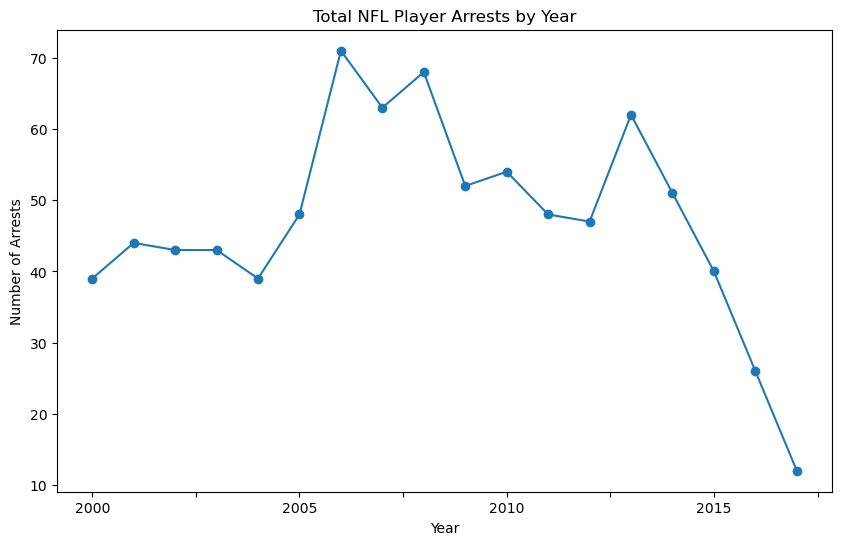

In [3]:
# Total Arrests by Year Line Graph
# Grab Data
arrests_each_year = arrest_data["YEAR"].value_counts()
arrests_each_year
# Sort the Data
arrests_each_year_sorted = arrests_each_year.sort_index()
# Plot
arrests_each_year_sorted.plot(kind="line",figsize=(10,6), marker='o')
plt.title("Total NFL Player Arrests by Year")
plt.xlabel("Year")
plt.ylabel("Number of Arrests")
plt.show()

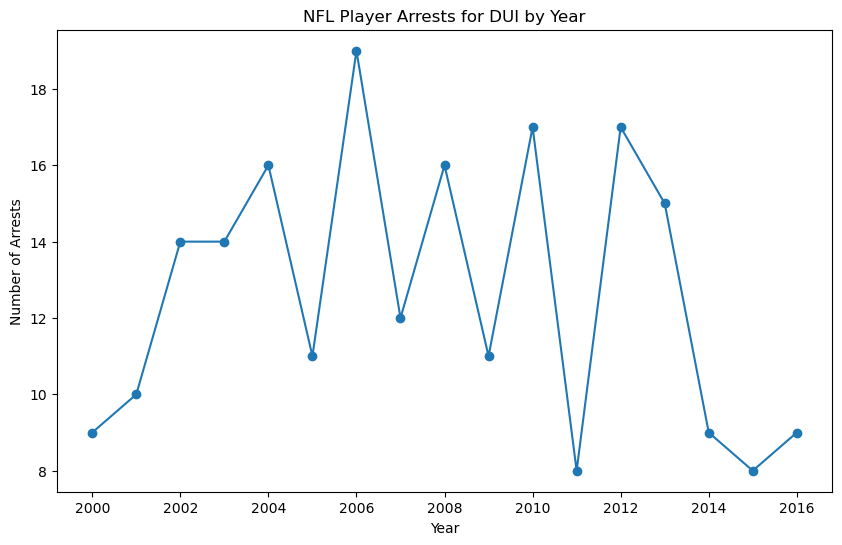

In [4]:
# DUI by Year Line Graph
# Get Data
dui_by_year = arrest_data.loc[arrest_data["CATEGORY"] == "DUI", :]["YEAR"].value_counts()
dui_by_year
# Sort the Data
dui_by_year_sorted = dui_by_year.sort_index()
# Plot
dui_by_year_sorted.plot(kind="line",figsize=(10,6), marker='o')
plt.title("NFL Player Arrests for DUI by Year")
plt.xlabel("Year")
plt.ylabel("Number of Arrests")
plt.show()

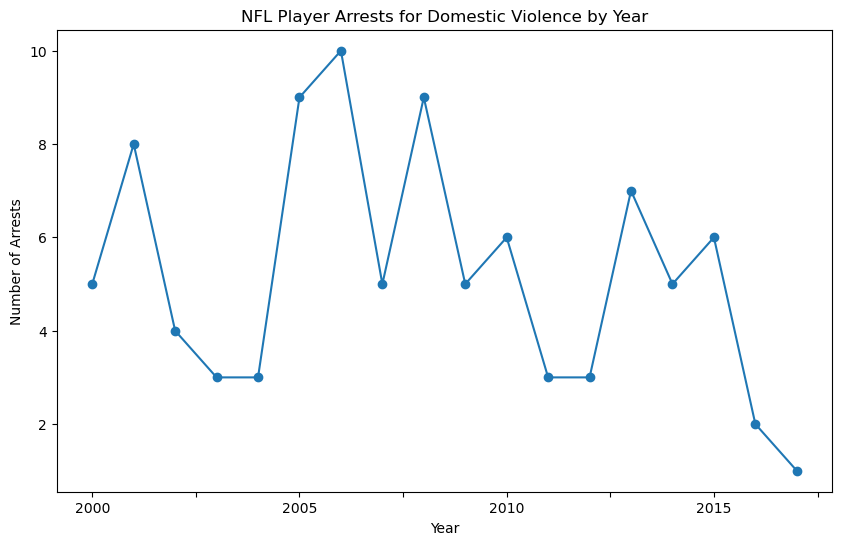

YEAR
2006    10
2008     9
2005     9
2001     8
2013     7
2015     6
2010     6
2007     5
2000     5
2009     5
2014     5
2002     4
2011     3
2012     3
2004     3
2003     3
2016     2
2017     1
Name: count, dtype: int64


In [5]:
# DV by Year Line Graph
# Get Data
dv_by_year = arrest_data.loc[arrest_data["CATEGORY"] == "Domestic violence", :]["YEAR"].value_counts()
dv_by_year
# Sort the Data
dv_by_year_sorted = dv_by_year.sort_index()
# Plot
dv_by_year_sorted.plot(kind="line",figsize=(10,6), marker='o')
plt.title("NFL Player Arrests for Domestic Violence by Year")
plt.xlabel("Year")
plt.ylabel("Number of Arrests")
plt.show()

print(dv_by_year)


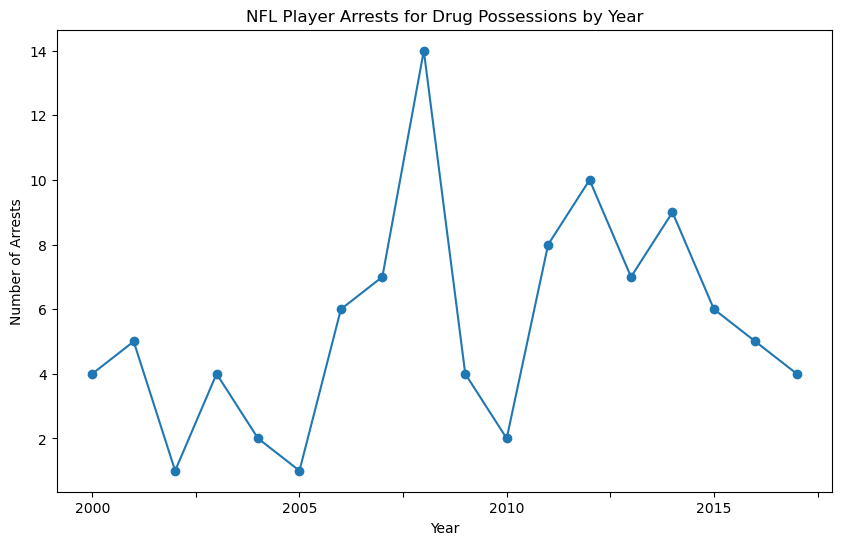

In [6]:
# Drug Arrests by Year Line Graph
drugs_by_year = arrest_data.loc[arrest_data["CATEGORY"] == "Drugs", :]["YEAR"].value_counts()
drugs_by_year
# Sort the Data
drugs_by_year_sorted = drugs_by_year.sort_index()
# Plot
drugs_by_year_sorted.plot(kind="line",figsize=(10,6), marker='o')
plt.title("NFL Player Arrests for Drug Possessions by Year")
plt.xlabel("Year")
plt.ylabel("Number of Arrests")
plt.show()

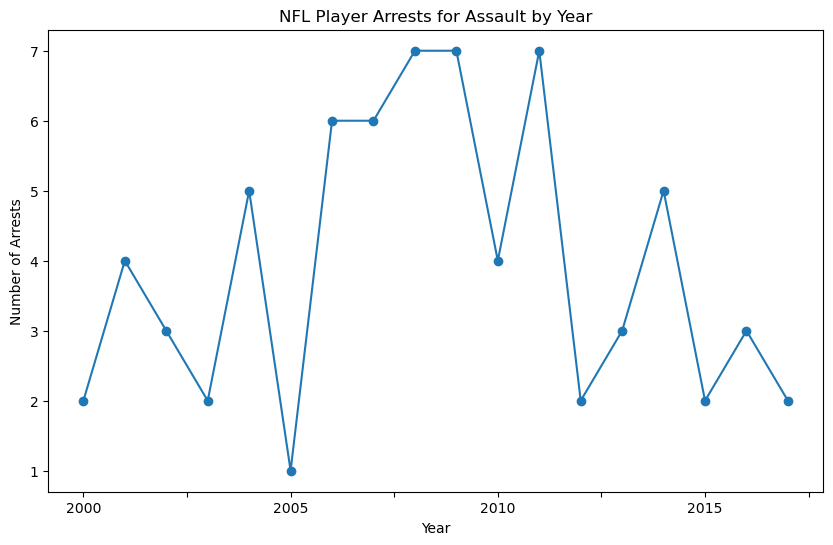

In [7]:
# Assault Arrests by Year Line Graph
assault_by_year = arrest_data.loc[arrest_data["CATEGORY"] == "Assault", :]["YEAR"].value_counts()
assault_by_year
# Sort the Data
assault_by_year_sorted = assault_by_year.sort_index()
# Plot
assault_by_year_sorted.plot(kind="line",figsize=(10,6), marker='o')
plt.title("NFL Player Arrests for Assault by Year")
plt.xlabel("Year")
plt.ylabel("Number of Arrests")
plt.show()

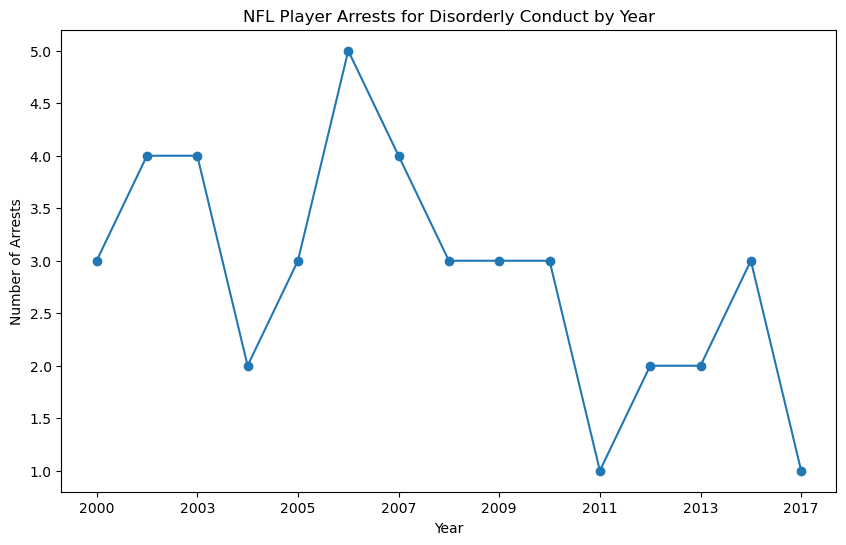

In [8]:
# Dissorderly Conduct Arrests by Year Line Graph
disorderly_conduct_by_year = arrest_data.loc[arrest_data["CATEGORY"] == "Disorderly conduct", :]["YEAR"].value_counts()
disorderly_conduct_by_year
# Sort the Data
disorderly_conduct_by_year_sorted = disorderly_conduct_by_year.sort_index()
# Plot
disorderly_conduct_by_year_sorted.plot(kind="line",figsize=(10,6), marker='o')
plt.title("NFL Player Arrests for Disorderly Conduct by Year")
plt.xlabel("Year")
plt.ylabel("Number of Arrests")
plt.show()

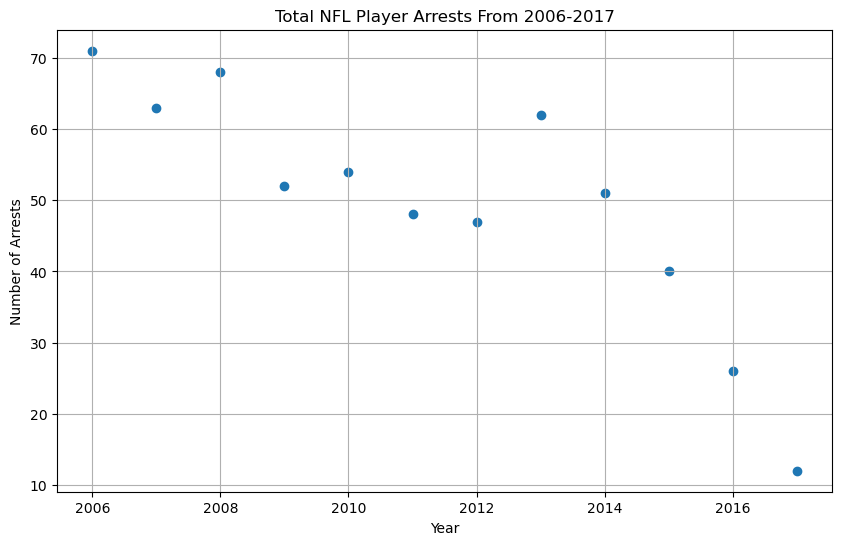

In [9]:
# Convert index to float type
arrests_by_year = arrest_data.groupby("YEAR").size()
arrests_by_year.index = arrests_by_year.index.astype(float)

# Filter years
arrests_by_year_filtered = arrests_by_year[(arrests_by_year.index >= 2006) & (arrests_by_year.index <= 2017)]

plt.figure(figsize=(10, 6))
plt.scatter(arrests_by_year_filtered.index, arrests_by_year_filtered.values)
plt.title('Total NFL Player Arrests From 2006-2017')
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.grid(True)
plt.show()

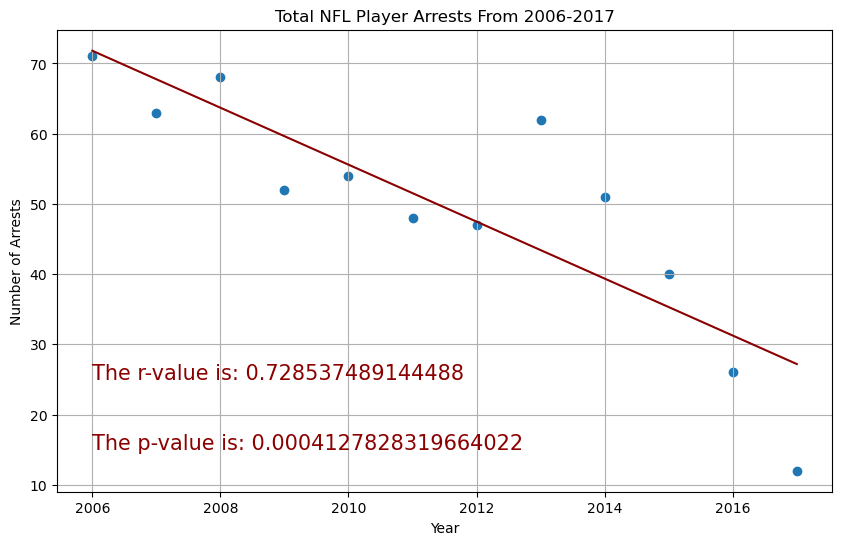

In [10]:
# Linear Regression Line
slope, intercept, rvalue, pvalue, stderr = linregress(arrests_by_year_filtered.index, arrests_by_year_filtered.values)
regress_values = slope * arrests_by_year_filtered.index + intercept
line_eq = line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
coordinates1 = (2006, 25)
coordinates2 = (2006, 15)
rv = (rvalue **2)

plt.figure(figsize=(10, 6))
plt.scatter(arrests_by_year_filtered.index, arrests_by_year_filtered.values)
plt.plot(arrests_by_year_filtered.index, regress_values, "darkred")
plt.annotate(f"The r-value is: {rv}", coordinates1, fontsize=15, color='darkred')
plt.annotate(f"The p-value is: {pvalue}", coordinates2, fontsize=15, color='darkred')
plt.title('Total NFL Player Arrests From 2006-2017')
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.grid(True)
plt.show()